In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\sonih\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
comp=pd.read_csv("C:\\Users\\sonih\\Downloads\\Computer_Data.csv")
comp.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [3]:
import seaborn as sbn
import statsmodels.api as sts

C:\Users\sonih\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


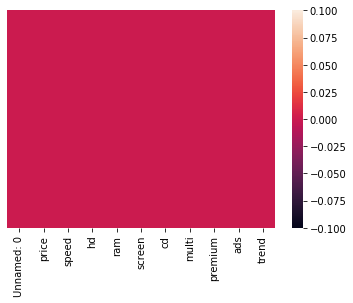

In [4]:
sbn.heatmap(comp.isnull(),yticklabels=False)

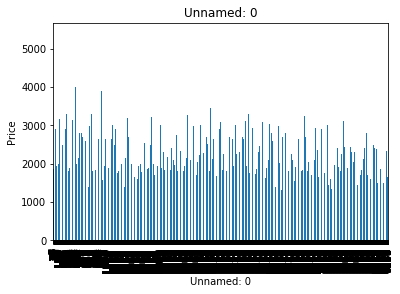

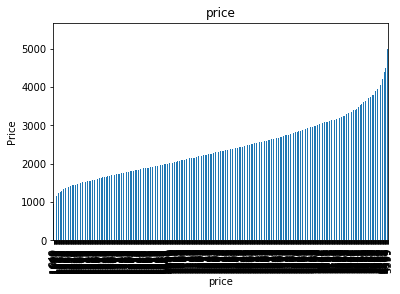

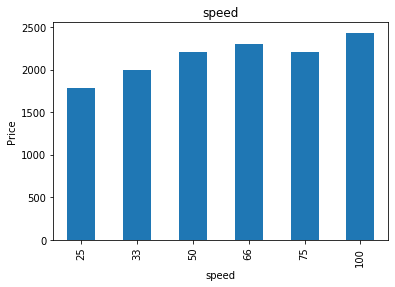

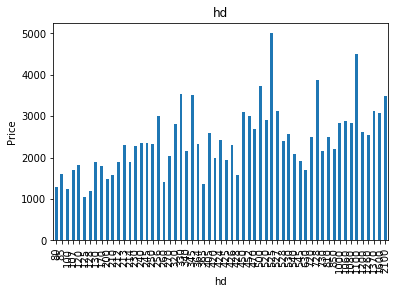

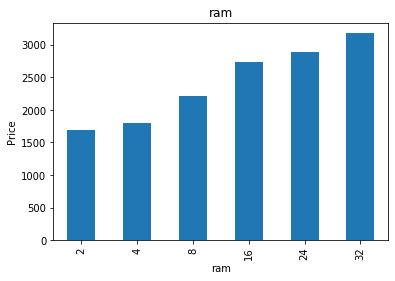

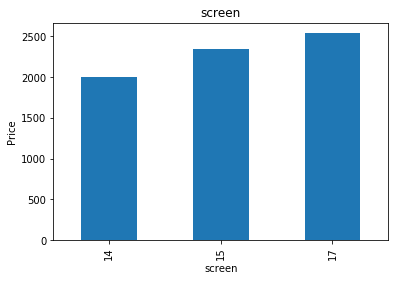

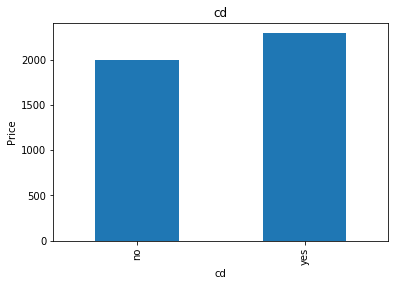

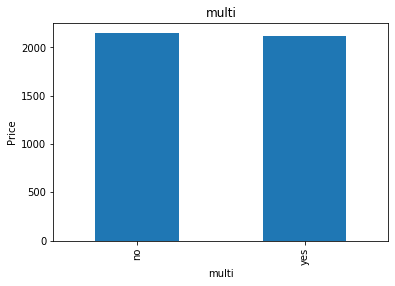

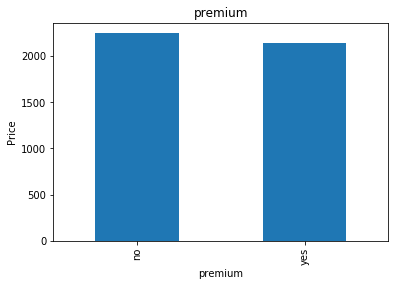

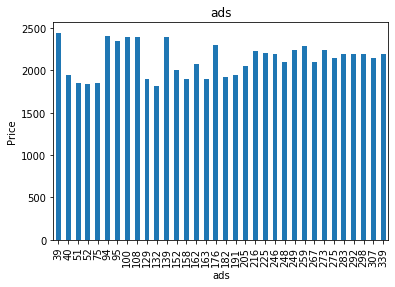

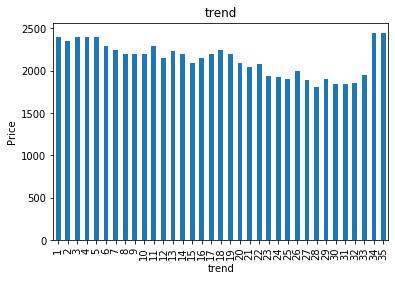

In [5]:
for feature in comp.columns:
    comp.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

In [6]:
comp=comp.drop(['Unnamed: 0'],axis=1)
comp.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [7]:
comp['cd']=pd.get_dummies(comp['cd'],drop_first=True)
comp['multi']=pd.get_dummies(comp['multi'],drop_first=True)
comp['premium']=pd.get_dummies(comp['premium'],drop_first=True)

In [8]:
X=comp.iloc[:,1:]
y=comp.iloc[:,:1]

In [9]:
model=sts.OLS(y,X).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          4.740e+04
Date:                Sat, 06 Jun 2020   Prob (F-statistic):                        0.00
Time:                        21:29:56   Log-Likelihood:                         -44052.
No. Observations:                6259   AIC:                                  8.812e+04
Df Residuals:                    6250   BIC:                                  8.818e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
speed          9.3310      0.185     50.325      0.000       8.968       9.695
hd             0.7786      0.028     28.146      0.000       0.724       0.833
ram           48.0928      1.068     45.042      0.000      46.000      50.186
screen       142.1451      1.435     99.043      0.000     139.332     144.959
cd            56.3969      9.493      5.941      0.000      37.787      75.007
multi        106.5261     11.427      9.322      0.000      84.125     128.928
premium     -494.9547     12.045    -41.091      0.000    -518.568    -471.342
ads            0.7292      0.049     14.748      0.000       0.632       0.826
trend        -51.6160      0.628    -82.153      0.000     -52.848     -50.384
==============================================================================
Omnibus:                      993.429   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2966.136
Skew:                           0.831   Prob(JB):                         0.00
Kurtosis:                       5.935   Cond. No.                     1.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
from scipy import stats
z=np.abs(stats.zscore(comp))
comp=comp[(z<3).all(axis=1)]

In [12]:
X=comp.iloc[:,1:]
y=comp.iloc[:,:1]
model=sts.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     2852.
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:30:00   Log-Likelihood:                -38036.
No. Observations:                5517   AIC:                         7.609e+04
Df Residuals:                    5508   BIC:                         7.615e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
speed          8.2135      0.169     48.571      0.000       7.882       8.545
hd             0.5752      0.029     19.648      0.000       0.518       0.633
ram           54.7812      1.029     53.216      0.000      52.763      56.799
screen        93.5509      3.778     24.762      0.000      86.145     100.957
cd            75.1531      8.917      8.428      0.000      57.673      92.633
multi         98.8780     10.138      9.754      0.000      79.004     118.752
premium      280.9220     55.722      5.042      0.000     171.685     390.159
ads            0.4715      0.047      9.970      0.000       0.379       0.564
trend        -47.4177      0.603    -78.670      0.000     -48.599     -46.236
==============================================================================
Omnibus:                      801.117   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2395.447
Skew:                           0.762   Prob(JB):                         0.00
Kurtosis:                       5.846   Cond. No.                     9.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
X.iloc[:,:].corr()

,speed,hd,ram,screen,cd,multi,premium,ads,trend
speed,1.000000,0.326454,0.181041,0.186475,0.257120,0.078658,NaN,-0.168470,0.392317
hd,0.326454,1.000000,0.767045,0.238661,0.528429,0.086625,NaN,-0.255190,0.588901
ram,0.181041,0.767045,1.000000,0.196438,0.418512,0.025386,NaN,-0.089750,0.229284
screen,0.186475,0.238661,0.196438,1.000000,0.142168,0.001061,NaN,-0.104478,0.188097
cd,0.257120,0.528429,0.418512,0.142168,1.000000,0.433168,NaN,-0.001025,0.470392
multi,0.078658,0.086625,0.025386,0.001061,0.433168,1.000000,NaN,-0.013599,0.218697
premium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ads,-0.168470,-0.255190,-0.089750,-0.104478,-0.001025,-0.013599,NaN,1.000000,-0.274120
trend,0.392317,0.588901,0.229284,0.188097,0.470392,0.218697,NaN,-0.274120,1.000000


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=False)

In [16]:
from sklearn.linear_model import LinearRegression

In [18]:
SLR=LinearRegression()

In [19]:
SLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_pred=SLR.predict(X_test)

In [22]:
from sklearn.metrics import r2_score

In [23]:
score=r2_score(y_test,y_pred)
print(score)

0.7945997032469636
